In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
df.shape

(95662, 16)

In [6]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [7]:
df['AccountId']=df['AccountId'].str.split('_').str[1]
df['AccountId']=df['AccountId'].astype(int)
df['BatchId']=df['BatchId'].str.split('_').str[1]
df['BatchId']=df['BatchId'].astype(int)
df['SubscriptionId']=df['SubscriptionId'].str.split('_').str[1]
df['SubscriptionId']=df['SubscriptionId'].astype(int)
df['CustomerId']=df['CustomerId'].str.split('_').str[1]
df['CustomerId']=df['CustomerId'].astype(int)
df['ProviderId']=df['ProviderId'].str.split('_').str[1]
df['ProviderId']=df['ProviderId'].astype(int)
df['ProductId']=df['ProductId'].str.split('_').str[1]
df['ProductId']=df['ProductId'].astype(int)
df['ChannelId']=df['ChannelId'].str.split('_').str[1]
df['ChannelId']=df['ChannelId'].astype(int)
df['TransactionId']=df['TransactionId'].str.split('_').str[1]
df['TransactionId']=df['TransactionId'].astype(int)

In [8]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
df['TransactionStartTime']=pd.to_datetime(df['TransactionStartTime'])

In [10]:
df.describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.0,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,70334.481581,70526.339173,3361.571648,3023.115845,3126.883590,256.0,4.657157,7.419069,2.622410,6.717846e+03,9.900584e+03,2.255974,0.002018
std,40626.774116,40586.254942,1560.040065,1293.973071,1650.972455,0.0,1.309014,4.655919,0.558568,1.233068e+05,1.231221e+05,0.732924,0.044872
min,1.000000,2.000000,1.000000,2.000000,1.000000,256.0,1.000000,1.000000,1.000000,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,35235.250000,35468.500000,2203.000000,2067.000000,1875.000000,256.0,4.000000,3.000000,2.000000,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,70319.500000,70614.000000,3919.000000,3829.000000,3124.000000,256.0,5.000000,6.000000,3.000000,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,105542.750000,105627.750000,4841.000000,3829.000000,4229.000000,256.0,6.000000,10.000000,3.000000,2.800000e+03,5.000000e+03,2.000000,0.000000
max,140681.000000,139493.000000,4841.000000,4836.000000,7479.000000,256.0,6.000000,27.000000,5.000000,9.880000e+06,9.880000e+06,4.000000,1.000000


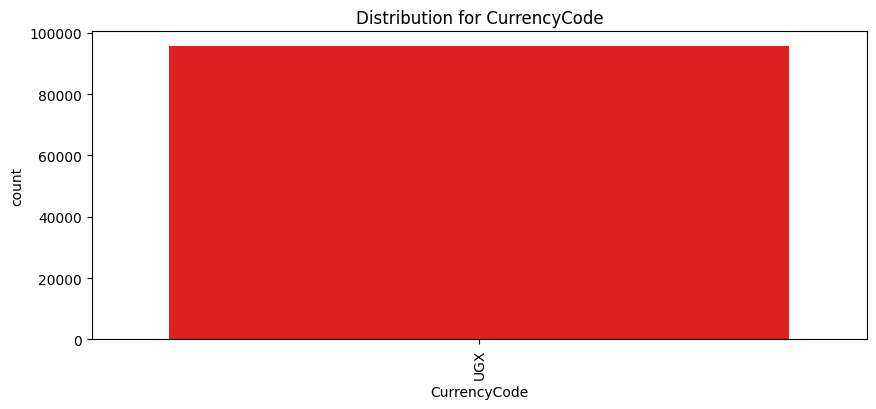

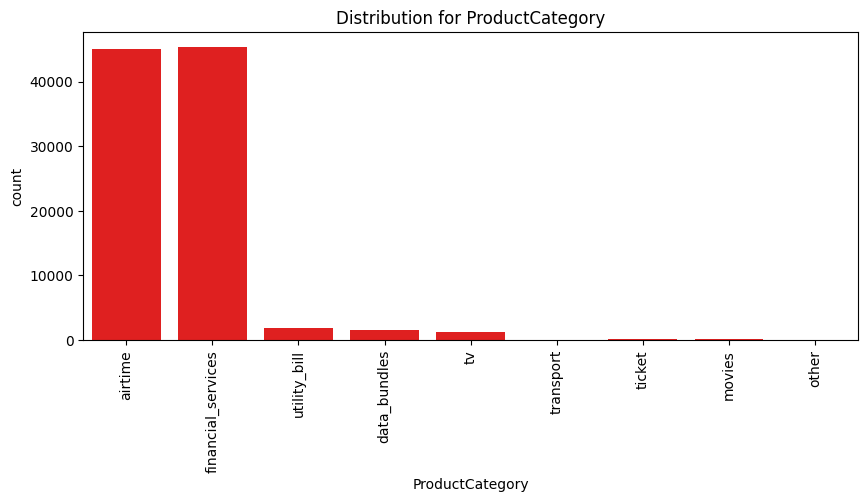

In [11]:
# categorical columns
categorical_columns = ['CurrencyCode', 'ProductCategory']

# Create a bar plot for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df , color= 'red')
    plt.title(f'Distribution for {col}')
    plt.xticks(rotation=90)
    plt.show()

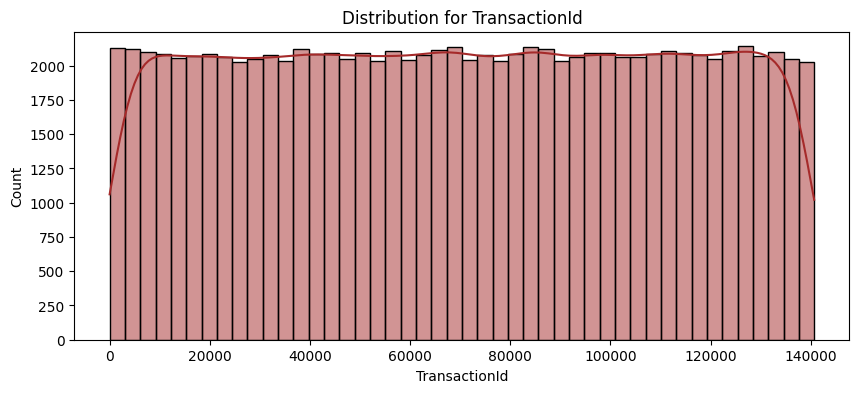

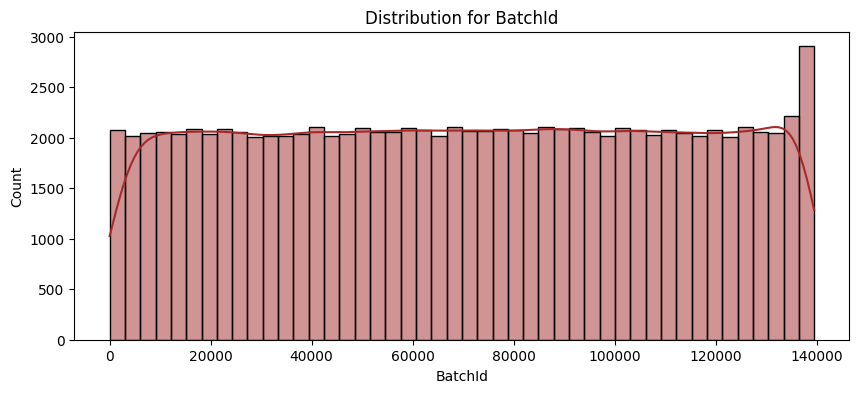

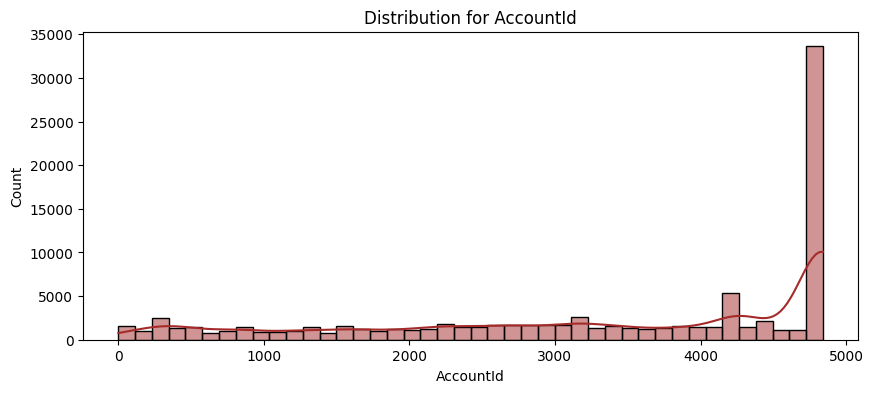

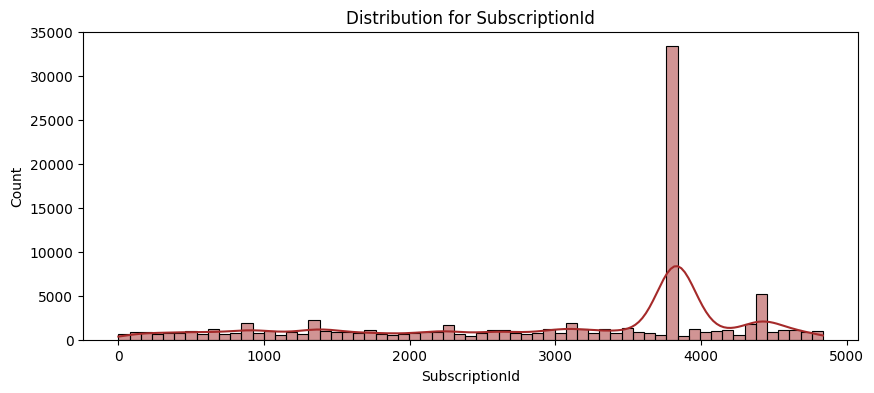

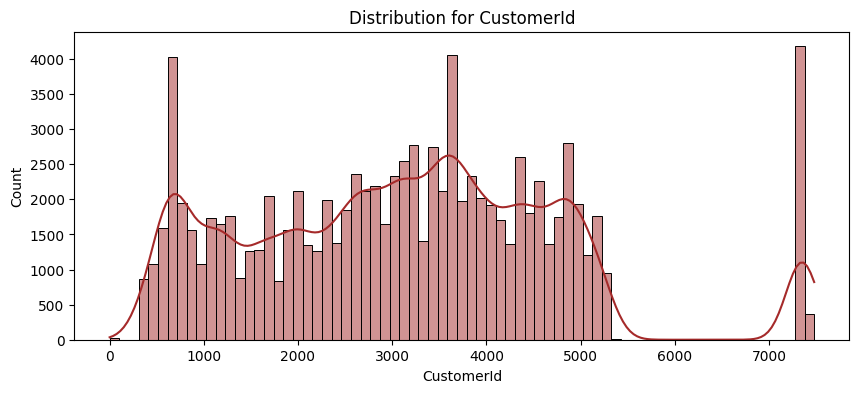

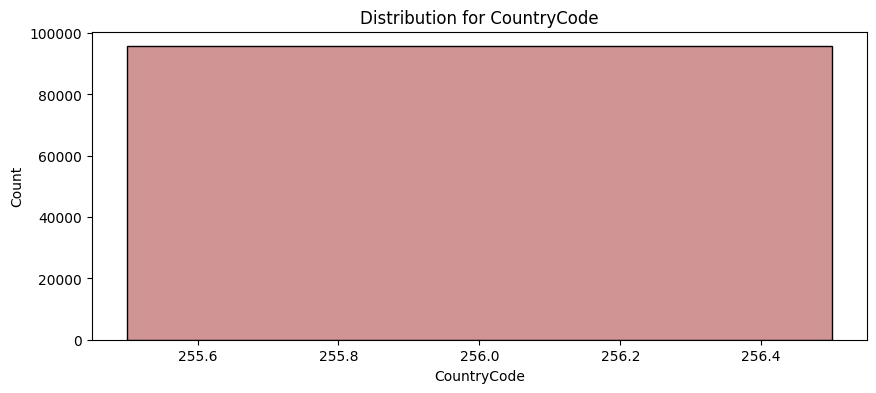

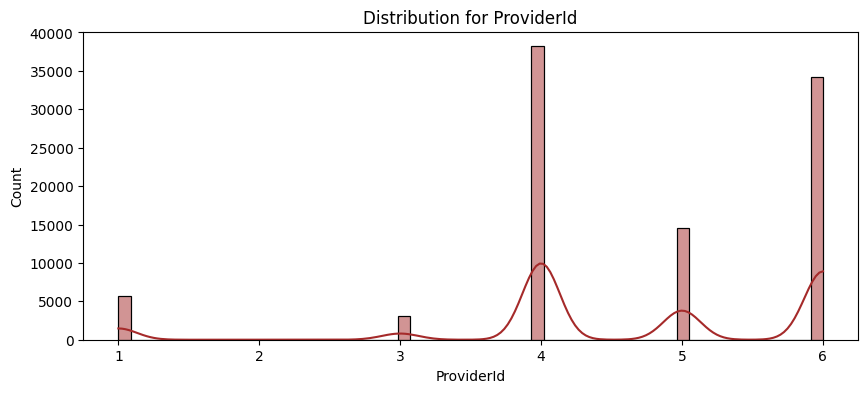

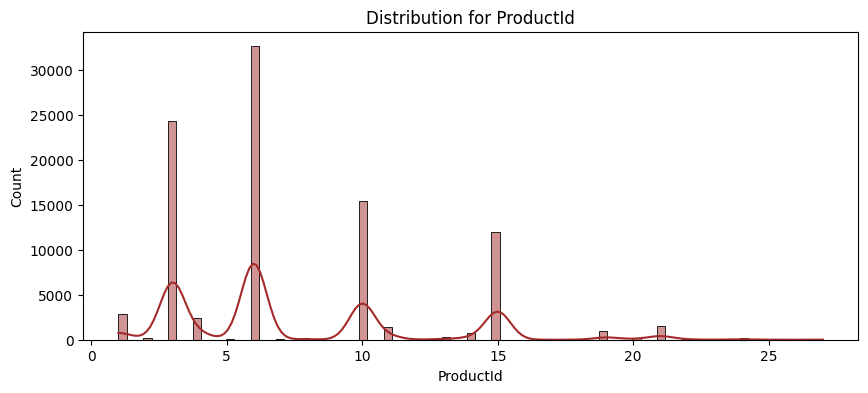

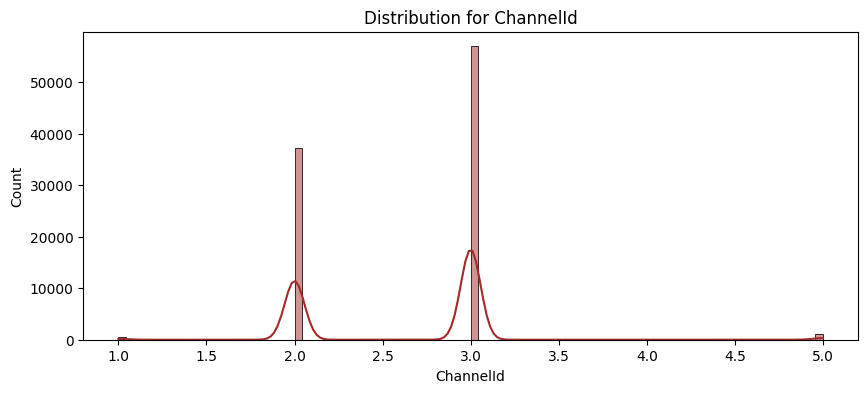

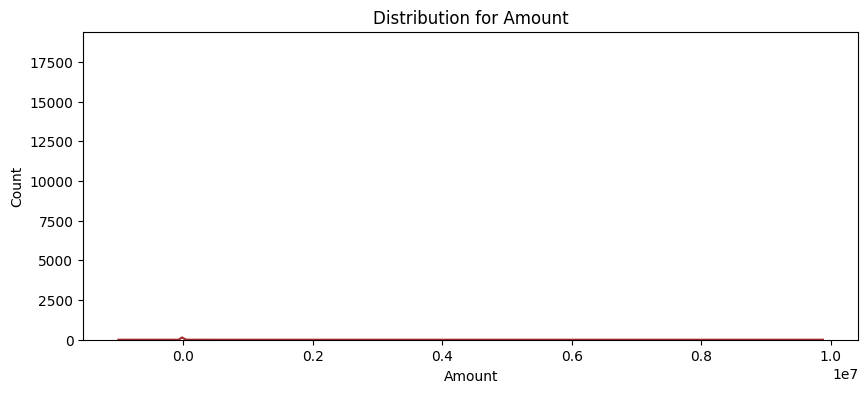

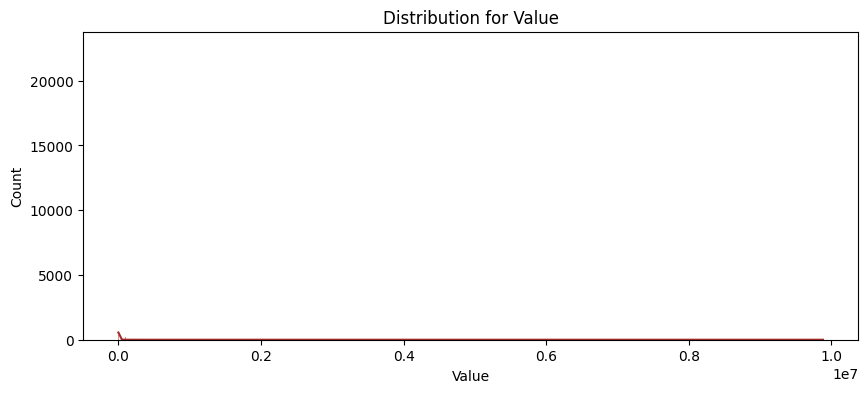

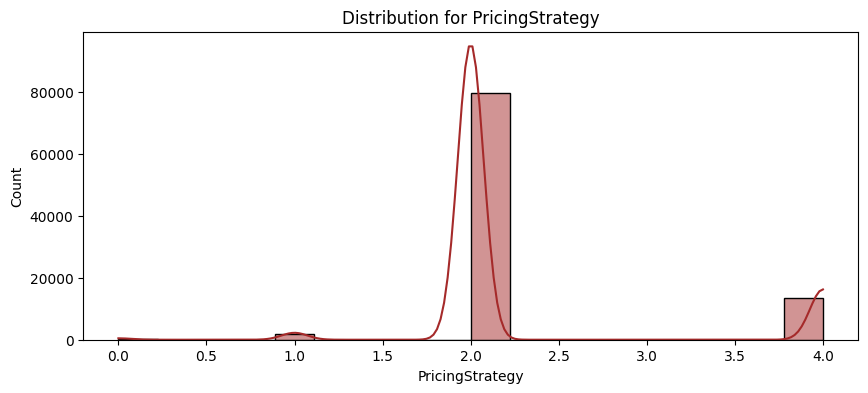

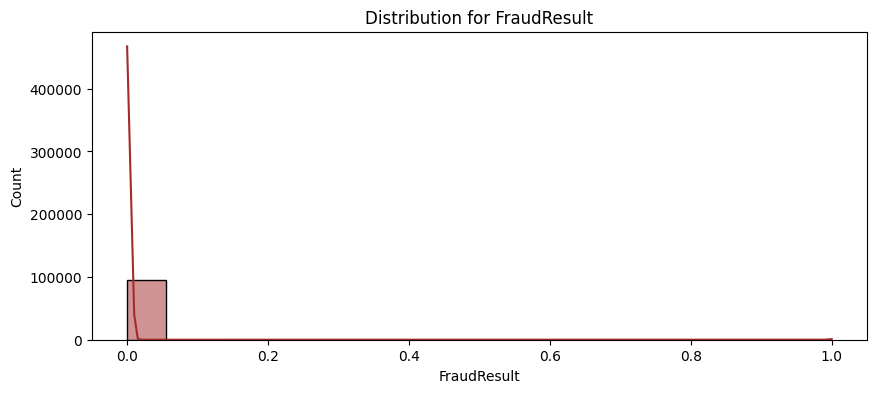

In [12]:
# List of numeric columns
numeric_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True , color="brown")
    plt.title(f'Distribution for {col}')
    plt.show()

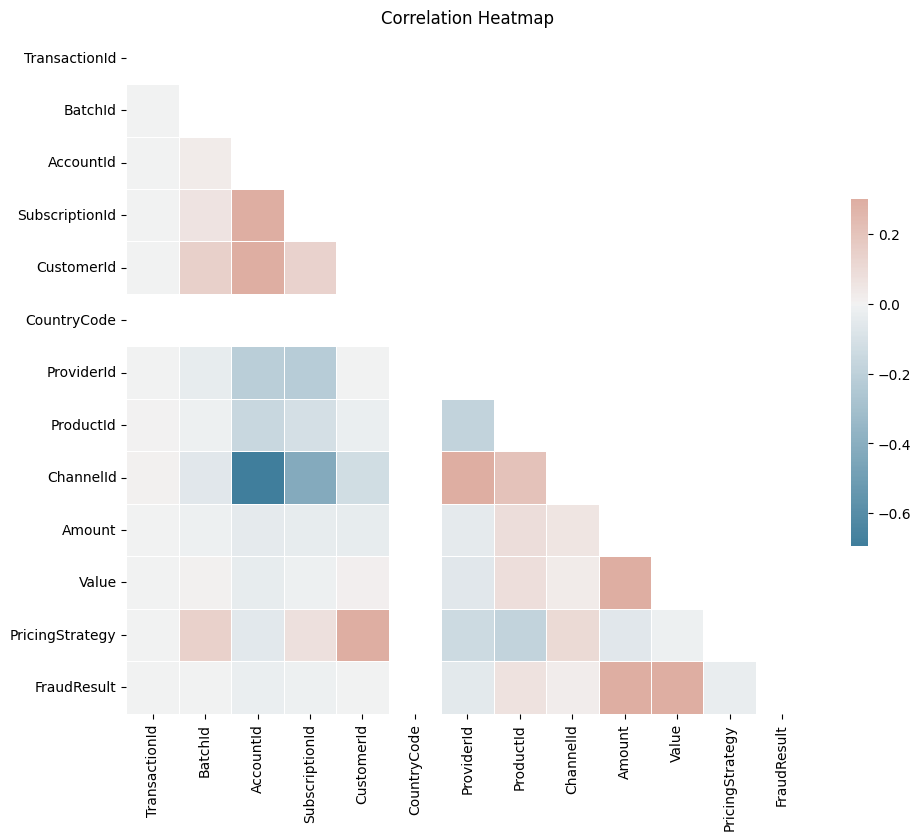

In [13]:
# Compute the correlation matrix
corr = df[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , color= 'purple')

plt.title('Correlation Heatmap')
plt.show()

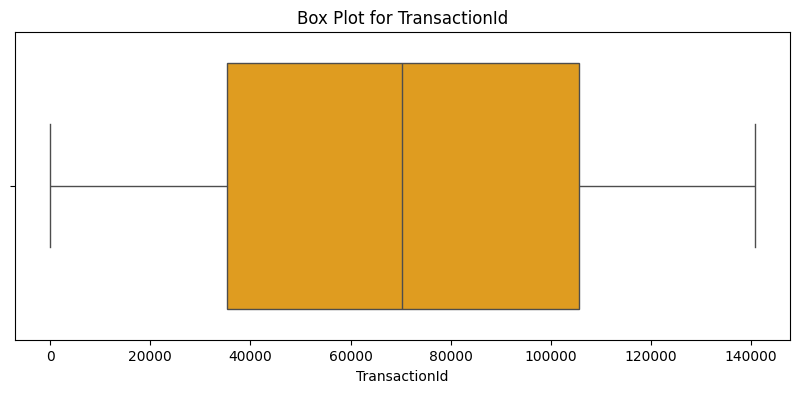

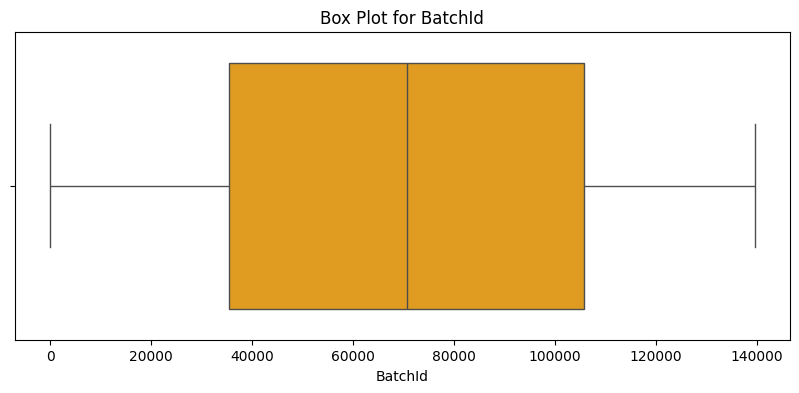

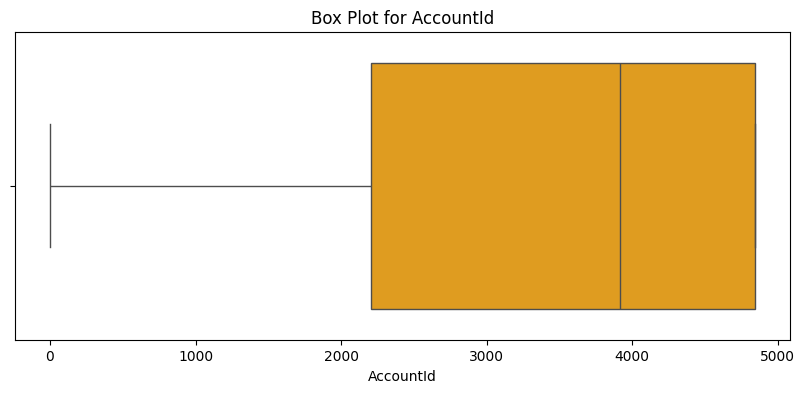

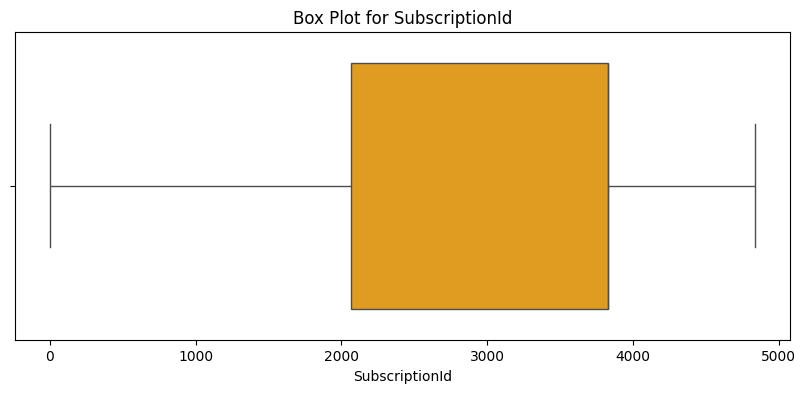

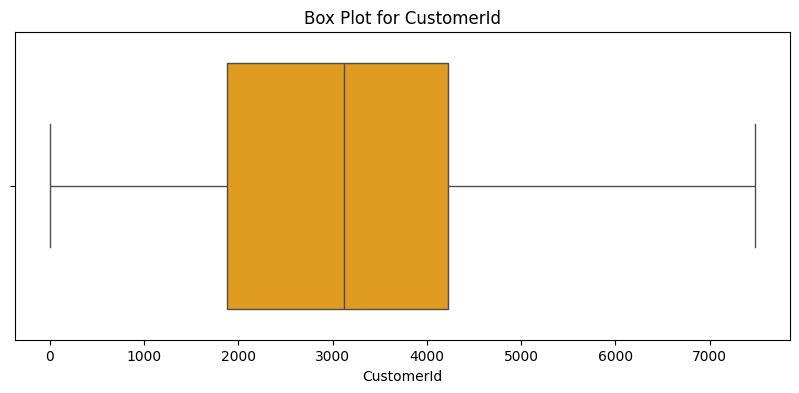

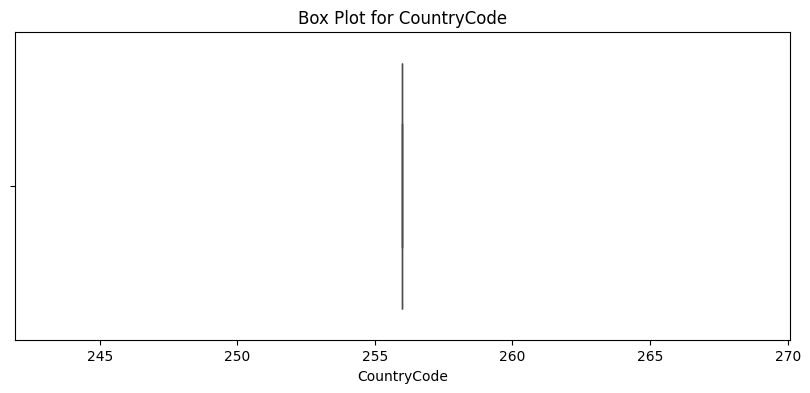

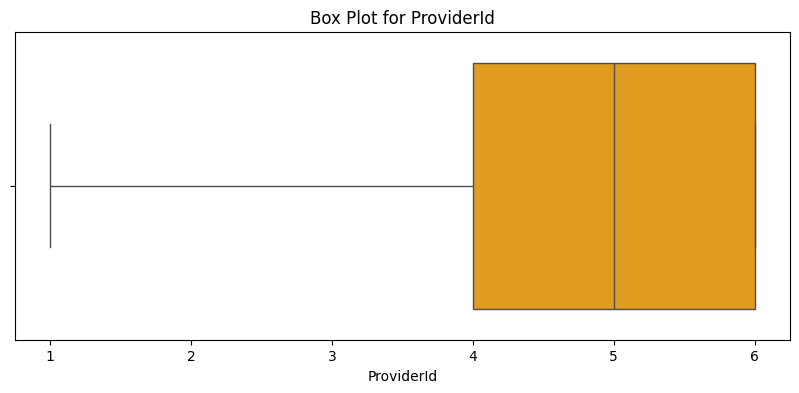

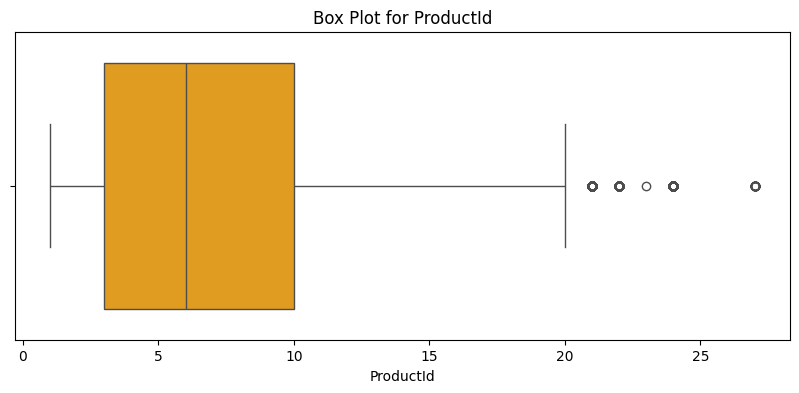

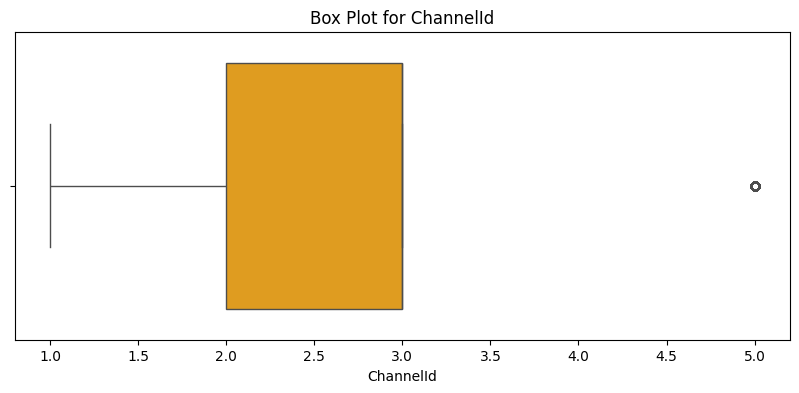

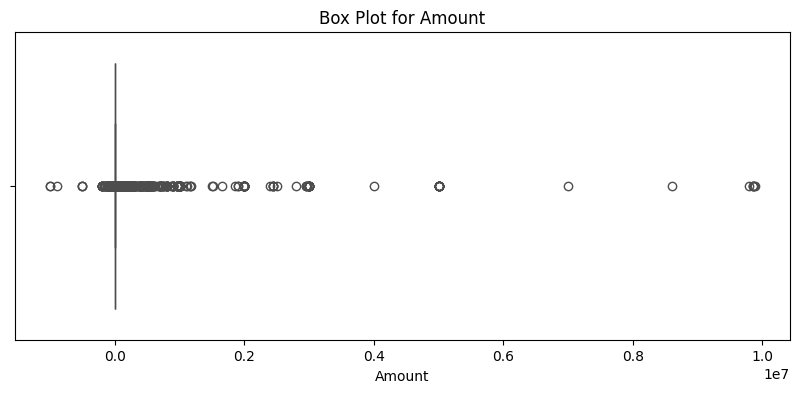

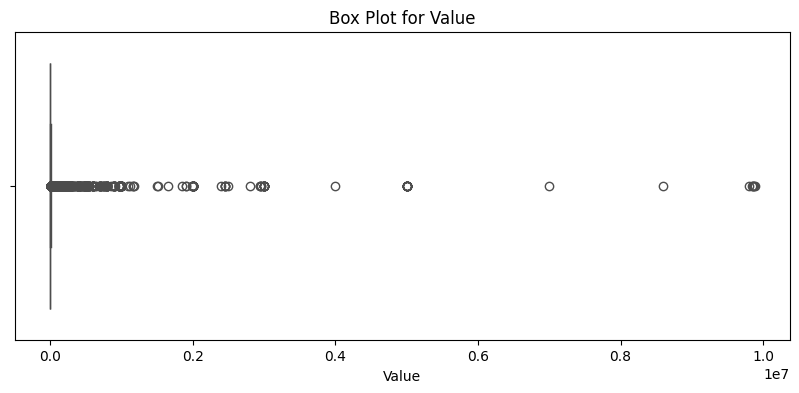

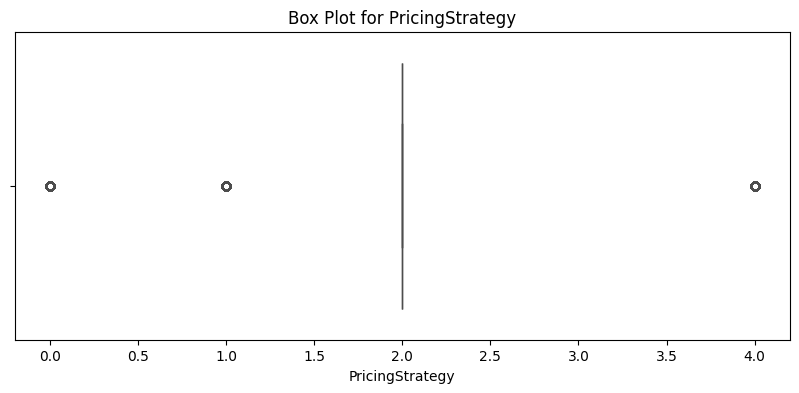

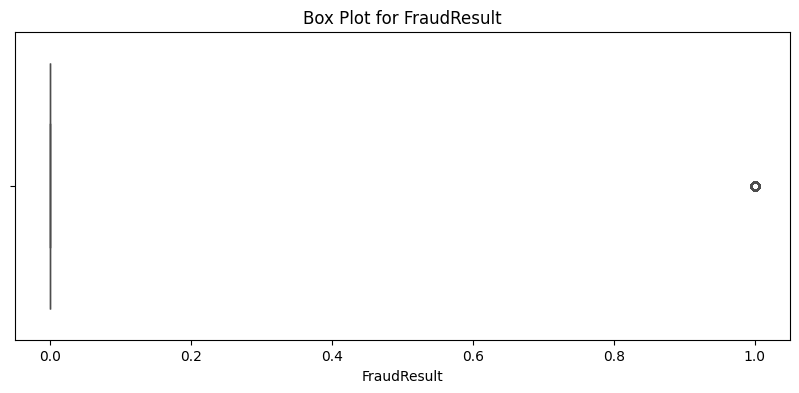

In [14]:
# Create a box plot for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color= 'orange')
    plt.title(f'Box Plot for {col}')
    plt.show()

In [15]:
df.to_csv('../data/cleaned_data.csv', index=False)